In [25]:
import numpy as np
import matplotlib.pyplot as plot
import cv2

In [31]:
img01=cv2.imread('yo2.jpg', cv2.IMREAD_GRAYSCALE)

In [32]:
print(img01.shape)#si la imagen es cargada a color, la tupla regresa tambiem los canales de color

(540, 960)


In [33]:
#Kernel Box Blur , matriz de 1s

kernel_1 = np.ones((16,16))/256

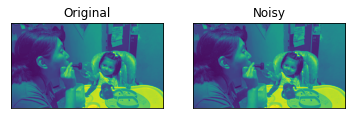

In [34]:
#Normaliza cada parche para que tengan media en cero, varianza unitaria y muestra 3 imágenes del listado.
rows, cols,  = img01.shape
media = 0
desviacionestandar = 1 #desviacion estandar es el parametro, 
#varianza es la desviacion estandar al cuadrado
n = 3
#ruido = np.random.normal(media,desviacionestandar, (rows, cols, n)).astype(np.uint8)
ruido = np.random.normal(media,desviacionestandar, (rows, cols)).astype(np.uint8)
#random.normal(loc=0.0, scale=1.0, size=None)
#size = int or tuple of ints, optional
#Output shape. If the given shape is, e.g., (m, n, k), then m * n * k samples are drawn.
# If size is None (default), a single value is returned if loc and scale are both scalars. 
#Otherwise, np.broadcast(loc, scale).size samples are drawn.
img01_ruido = img01 + ruido

plot.subplot(121),plot.imshow(img01),plot.title('Original')
plot.xticks([]), plot.yticks([])
plot.subplot(122),plot.imshow(img01_ruido),plot.title('Noisy')
plot.xticks([]), plot.yticks([])
plot.show()


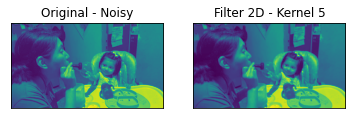

In [48]:
#obtener 3 imagenes con el filtro 2d, kernel 16.
#imagen 1= 5
#imagen 2 = 10
#imagen 3 = 16

src = img01_ruido

ddepth = -1

kernel_size_1 = 5
kernel_size_2 = 10
kernel_size_3 = 16

kernel_img1 = np.ones((kernel_size_1, kernel_size_1))/(kernel_size_1*kernel_size_1)
kernel_img2 = np.ones((kernel_size_2, kernel_size_2))/ (kernel_size_2*kernel_size_2)
kernel_img3 = np.ones((kernel_size_3, kernel_size_3))/ (kernel_size_3*kernel_size_3)

dst_1 = cv2.filter2D(src, ddepth, kernel_img1)
dst_2 = cv2.filter2D(src, ddepth, kernel_img2)
dst_3 = cv2.filter2D(src, ddepth, kernel_img3)

plot.subplot(121),plot.imshow(img01_ruido),plot.title('Original - Noisy')
plot.xticks([]), plot.yticks([])
plot.subplot(122),plot.imshow(dst_1),plot.title('Filter 2D - Kernel 5')
plot.xticks([]), plot.yticks([])
plot.show()



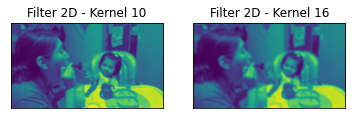

In [49]:
plot.subplot(121),plot.imshow(dst_2),plot.title('Filter 2D - Kernel 10')
plot.xticks([]), plot.yticks([])
plot.subplot(122),plot.imshow(dst_3),plot.title('Filter 2D - Kernel 16')
plot.xticks([]), plot.yticks([])
plot.show()

In [51]:
#Con la imagen del punto 1 aplica un filtro gaussiano con un kernel de 3 x 3 y varianza = 1/(2Ln2)  y muestra el resultado.
#varianza es desviacion estandar al cuadrado
#por lo tanto, desviacion estandar es la raiz cuadrada de la varianza

import math

v=  1 / (2*math.log(2)) 
ds=  math.sqrt(v) 

img01_gblur = cv2.GaussianBlur(img01,(3,3),ds)


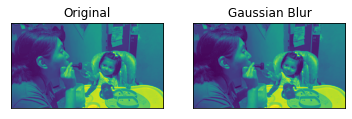

In [52]:
plot.subplot(121),plot.imshow(img01),plot.title('Original')
plot.xticks([]), plot.yticks([])
plot.subplot(122),plot.imshow(img01_gblur),plot.title('Gaussian Blur')
plot.xticks([]), plot.yticks([])
plot.show()

In [53]:
print (ds)

0.8493218002880191


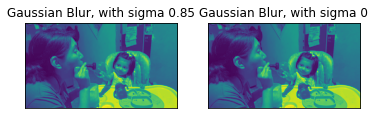

In [55]:
#Test : ¿que pasa si se coloca desde el principio el valor de sigma en 0?
img01_gblur_ds0 = cv2.GaussianBlur(img01,(3,3), 0)

plot.subplot(121),plot.imshow(img01_gblur),plot.title('Gaussian Blur, with sigma 0.85')
plot.xticks([]), plot.yticks([])
plot.subplot(122),plot.imshow(img01_gblur_ds0),plot.title('Gaussian Blur, with sigma 0')
plot.xticks([]), plot.yticks([])
plot.show()



Describe en un párrafo el efecto del filtro gaussiano anterior sobre la imagen:
El resultado de la desviación estándar es cercano a 1, si se compara con la imagen con el mismo tamaño de kernel, pero ahora con un sigma de 0, la imagen con sigma 0.85 se nota ligermente más borrosa que la de sigma 0 respecto a la imagen original.


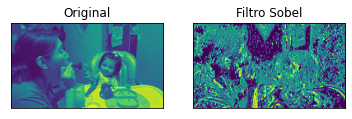

In [72]:
#Utilizando funciones de SciPy aplica 5 filtros diferentes a la imagen cargada previamente y explica sus efectos
from scipy.ndimage import sobel

#Filtro 1
img_f1_sobel = sobel(img01,axis=-1, output=None, mode='reflect', cval=0.0)

plot.subplot(121),plot.imshow(img01),plot.title('Original')
plot.xticks([]), plot.yticks([])
plot.subplot(122),plot.imshow(img_f1_sobel),plot.title('Filtro Sobel')
plot.xticks([]), plot.yticks([])
plot.show()


Explicación de efectos del filtro Sobel: Este filtro es utilizado para la detección de bordes. 
El parámetro mode determina como el arreglo de entrada se extiende cuando el filtro se empalma con un borde, en este caso se dejó el valor por defecto, reflect.
La imagen de entrada es extendida reflejando cerca del borde del último pixel.
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.sobel.html#scipy.ndimage.sobel


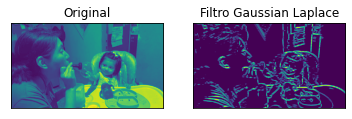

In [73]:
from scipy.ndimage import gaussian_laplace

#Filtro 2
img_f2_gl = gaussian_laplace(img01, sigma=3)

plot.subplot(121),plot.imshow(img01),plot.title('Original')
plot.xticks([]), plot.yticks([])
plot.subplot(122),plot.imshow(img_f2_gl),plot.title('Filtro Gaussian Laplace')
plot.xticks([]), plot.yticks([])
plot.show()

Explicación de efectos del filtro Gaussian Laplace: Este filtro es utilizado para la detección de bordes. Primero reduce el ruido aplicando un filtro Gaussiano, luego detecta bordes con Laplace. Por eso se dice que esta básado en segundas derivadas Gaussianas.
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.gaussian_laplace.html#scipy.ndimage.gaussian_laplace

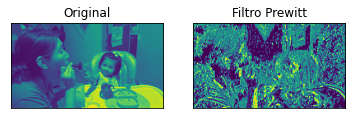

In [74]:
from scipy.ndimage import prewitt

#Filtro 3
img_f3_prewitt = prewitt(img01,axis=-1, output=None, mode='reflect', cval=0.0)

plot.subplot(121),plot.imshow(img01),plot.title('Original')
plot.xticks([]), plot.yticks([])
plot.subplot(122),plot.imshow(img_f3_prewitt),plot.title('Filtro Prewitt')
plot.xticks([]), plot.yticks([])
plot.show()

Explicación de efectos del filtro Prewitt: Este filtro es utilizado para la detección de bordes, es muy similar al filtro Sobel. Ambos utilizan kernel de 3, pero con máscaras diferentes.#https://www.researchgate.net/figure/Kernel-of-a-Prewitt-operator-and-b-Sobel-operators_fig2_311605340
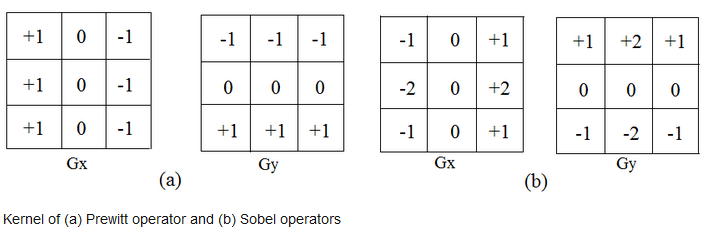

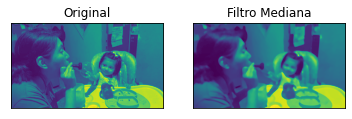

In [80]:
from scipy.ndimage import median_filter

#Filtro 4
img_f4_median = median_filter(img01, size = 15)

plot.subplot(121),plot.imshow(img01),plot.title('Original')
plot.xticks([]), plot.yticks([])
plot.subplot(122),plot.imshow(img_f4_median),plot.title('Filtro Mediana')
plot.xticks([]), plot.yticks([])
plot.show()

Explicación de efectos del filtro Median: Este filtro es uno de los tipos de filtros no lineales. Es muy eficaz para eliminar el ruido impulsivo, el ruido "sal y pimienta", de la imagen. El principio del filtro de mediana es sustituir el nivel de gris de cada píxel por la mediana de los niveles de gris en una zona próxima a los píxeles, en lugar de utilizar la operación de promedio.#https://www.sciencedirect.com/topics/computer-science/median-filter

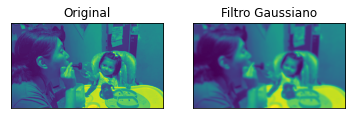

In [81]:
from scipy.ndimage import gaussian_filter

#Filtro 5
img_f5_gf = gaussian_filter(img01, sigma=5)

plot.subplot(121),plot.imshow(img01),plot.title('Original')
plot.xticks([]), plot.yticks([])
plot.subplot(122),plot.imshow(img_f5_gf),plot.title('Filtro Gaussiano')
plot.xticks([]), plot.yticks([])
plot.show()

Explicación de efectos de filtro Gaussiano : Los resultados del suavizado gaussiano son disminución de la nitidez de la imagen, imagen más borrosa o difusa (debido que se difuminan los bordes) y pérdida gradual de detalles. El valor de sigma indica el grado de dispersión de los datos. Un valor pequeño de sigma indica que la región central de la distribución Gaussiana es más concentrada por lo que el efecto de suavizado es peor. Un valor de sigma mayor mejora el suavizado de la imagen dado que la región central de la distribución Gaussiana es mayor. #https://cursos.tecmilenio.mx/courses/129590

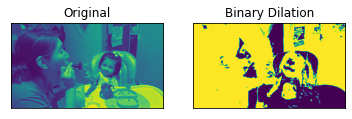

In [92]:
#Utilizando funciones de SciPy aplica 5 operadores morfológicos a la imagen cargada previamente y explica sus efectos.

#imagen a arreglo binario

umbral = 125

img_binaria = np.uint8((img01 < umbral)*255)

#plot.imshow(img_binaria)

#Operador Morfológico 1

from scipy.ndimage import binary_dilation

img_o1_db = binary_dilation(img_binaria, structure=None, iterations=1, \
                            mask=None, output=None, border_value=0, origin=0, brute_force=False)

plot.subplot(121),plot.imshow(img01),plot.title('Original')
plot.xticks([]), plot.yticks([])
plot.subplot(122),plot.imshow(img_o1_db),plot.title('Binary Dilation')
plot.xticks([]), plot.yticks([])
plot.show()

La dilatación es una operación de morfología matemática que utiliza un elemento estructurante para expandir las formas de una imagen. La dilatación binaria de una imagen mediante un elemento estructurante es el lugar geométrico de los puntos cubiertos por el elemento estructurante, cuando su centro se encuentra dentro de los puntos no nulos de la imagen. #https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.binary_dilation.html#scipy.ndimage.binary_dilation

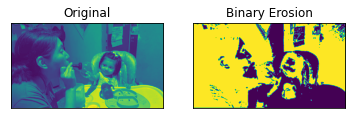

In [93]:
#Operador Morfológico 2

from scipy.ndimage import binary_erosion

img_o2_be = binary_erosion(img_binaria, structure=None, iterations=1, mask=None, output=None, border_value=0, origin=0, brute_force=False)

plot.subplot(121),plot.imshow(img01),plot.title('Original')
plot.xticks([]), plot.yticks([])
plot.subplot(122),plot.imshow(img_o2_be),plot.title('Binary Erosion')
plot.xticks([]), plot.yticks([])
plot.show()

La erosión es una operación de morfología matemática que utiliza un elemento estructurante para reducir las formas de una imagen. La erosión binaria de una imagen mediante un elemento estructurante es el lugar de los puntos en los que una superposición del elemento estructurante centrada en el punto está totalmente contenida en el conjunto de elementos distintos de cero de la imagen. #https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.binary_erosion.html

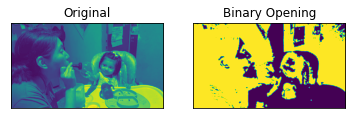

In [95]:
#Operador Morfológico 3

from scipy.ndimage import binary_opening

img_o3_bo = binary_opening(img_binaria, structure=None, iterations=3, output=None, origin=0, mask=None, border_value=0, brute_force=False)

plot.subplot(121),plot.imshow(img01),plot.title('Original')
plot.xticks([]), plot.yticks([])
plot.subplot(122),plot.imshow(img_o3_bo),plot.title('Binary Opening')
plot.xticks([]), plot.yticks([])
plot.show()


La apertura es una operación de morfología matemática que consiste en la sucesión de una erosión y una dilatación de la entrada con el mismo elemento estructurante. La apertura, por tanto, elimina objetos más pequeños que el elemento estructurante.

Junto con el cierre (binary_closing), la apertura puede utilizarse para la eliminación de ruido. #https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.binary_opening.html#scipy.ndimage.binary_opening

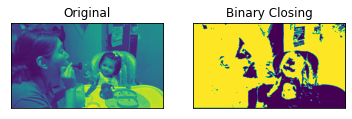

In [96]:
#Operador Morfológico 4

from scipy.ndimage import binary_closing

img_o4_bc = binary_closing(img_binaria, structure=None, iterations=1, output=None,\
                           origin=0, mask=None, border_value=0, brute_force=False)

plot.subplot(121),plot.imshow(img01),plot.title('Original')
plot.xticks([]), plot.yticks([])
plot.subplot(122),plot.imshow(img_o4_bc),plot.title('Binary Closing')
plot.xticks([]), plot.yticks([])
plot.show()

El cierre es una operación de morfología matemática que consiste en la sucesión de una dilatación y una erosión de la entrada con el mismo elemento estructurante. Por lo tanto, el cierre rellena agujeros más pequeños que el elemento estructurante.

Junto con la apertura (binary_opening), el cierre puede utilizarse para la eliminación de ruidos.#https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.binary_closing.html#scipy.ndimage.binary_closing

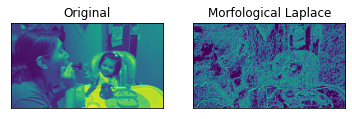

In [102]:
#Operador Morfológico 5

from scipy.ndimage import morphological_laplace

img_o5_ml = morphological_laplace(img01, size=2, footprint=None, structure=None,\
                                  output=None, mode='reflect', cval=0.0, origin=0)

plot.subplot(121),plot.imshow(img01),plot.title('Original')
plot.xticks([]), plot.yticks([])
plot.subplot(122),plot.imshow(img_o5_ml),plot.title('Morfological Laplace')
plot.xticks([]), plot.yticks([])
plot.show()


El Laplaciano Morfológico realiza el Laplaciano Morfológico de una imagen, que se define como la diferencia aritmética entre el gradiente interno y el gradiente externo.#https://juliaimages.org/dev/examples/image_morphology/image_morphology/